In [1]:
import pandas as pd
from pathlib import Path
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Config:
    cancer_csvpth = Path('./breast_cancer_data.csv')

In [3]:
df = pd.read_csv(Config.cancer_csvpth)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
# since id and diagnosis columns are not float64
# we drop these two columns
df = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])

In [38]:
class PCA():
    def __init__(self, data):
        self.data = data

    def pca(self, n_dims):
        self.n_dims = n_dims
        data = copy.deepcopy(self.data)

        data_mean = data.mean()
        data -= data_mean
        cov = data.cov()

        eig_vals, eig_vec = np.linalg.eig(cov)
        eig_sort = [x for _, x in sorted(zip(eig_vals, eig_vec), key=lambda val: val[0], reverse=True)]
        eig_chosen = np.array(eig_sort[:n_dims])
        data = np.matmul(eig_chosen, data.transpose()).transpose()

        return data

    def p_comps(self):
        data = copy.deepcopy(self.data)

        data_mean = data.mean()
        data -= data_mean
        cov = data.cov()
        
        eig_vals, eig_vec = np.linalg.eig(cov)
        eig_vec_sort = [x for _, x in sorted(zip(eig_vals, eig_vec), key=lambda val: val[0], reverse=True)]
        eig_val_sort = [x for x, _ in sorted(zip(eig_vals, eig_vec), key=lambda val: val[0], reverse=True)]
        eig_vec_chosen = np.array(eig_vec_sort[:self.n_dims])
        eig_val_chosen = np.array(eig_val_sort[:self.n_dims])
        
        return eig_vec_chosen, eig_val_chosen

# PCA on breast cancer dataset

In [40]:
pca_obj = PCA(df)

In [41]:
d = pca_obj.pca(n_dims=10)

In [42]:
d

,0,1,2,3,4,5,6,7,8,9
0,-34.294178,-125.642599,-113.423118,7.189935,779.803259,-294.845184,-245.832401,559.564524,7.782450,10.974882
1,-50.998462,-243.490695,-220.122876,27.358550,734.483779,-278.552983,-239.277586,516.177420,-17.927627,11.635675
2,-37.956867,-198.924200,-180.297027,25.093029,566.193770,-216.570063,-181.430007,401.140857,-4.331121,9.157390
3,17.291182,97.365465,88.310610,-10.656222,-214.382305,79.941576,68.888641,-147.746839,4.755648,-3.227252
4,-37.142729,-232.991409,-212.545672,23.074700,475.613696,-180.067432,-152.996169,339.118279,-0.716068,5.575246
...,...,...,...,...,...,...,...,...,...,...
564,-51.179975,-298.926721,-271.093799,37.559229,785.374016,-299.996997,-245.867225,555.947911,8.383568,12.801013
565,-41.304919,-219.906861,-198.774742,33.532774,579.829286,-226.261223,-185.383136,412.301044,-2.870456,11.890644
566,-13.214323,-73.782325,-66.610138,16.321469,164.638599,-67.029512,-54.355908,119.594667,-3.331259,4.176817
567,-44.373308,-221.651345,-200.462657,34.618639,638.874036,-252.237583,-209.483265,464.134860,-8.400932,12.800038


# PC1 vs PC2 for first four components

In [43]:
pcs = d.iloc[:, range(0, 4)]

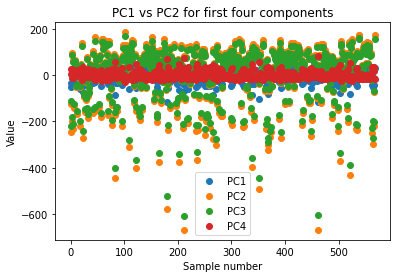

In [44]:
for i in range(0, 4):
    plt.scatter(x=range(569), y=pcs.iloc[:, i], label=f'PC{i+1}')

plt.title('PC1 vs PC2 for first four components')
plt.xlabel('Sample number')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plotting proportional variance and cummulative variance

In [45]:
_, eig_vals = pca_obj.p_comps() 

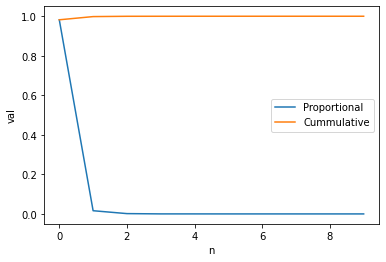

In [48]:
sm = eig_vals.sum()
prop_var = eig_vals / sm
cumm_var = np.cumsum(prop_var)
    
plt.plot(range(eig_vals.shape[0]), prop_var, label='Proportional')
plt.plot(range(eig_vals.shape[0]), cumm_var, label='Cummulative')
plt.xlabel('n')
plt.ylabel('val')
plt.legend()
plt.show()